# Modelizacion Supervisada

## 1. Importar paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

%config IPCompleter.greedy = True
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

## 2. Cargar los datos

In [2]:
ruta = 'C:/Users/matia/OneDrive/Escritorio/Churn_Bank'

In [3]:
nombre_df = 'df_tablon.pickle'

In [4]:
df = pd.read_pickle(ruta + '/02_Datos/03_Trabajo/' + nombre_df)

## 3. Modelizacion

### 3.1 Separacion en dataset de entrenamiento y validacion

In [5]:
x = df.drop(columns = 'Exited')
y = df['Exited']

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

### 3.2 Creacion de la Pipeline

In [7]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

In [8]:
grid = [
    {
        'algoritmo': [DecisionTreeClassifier()],
        'algoritmo__max_depth': [None, 5, 10, 15],
        'algoritmo__min_samples_split': [2, 5, 10],
        'algoritmo__min_samples_leaf': [1, 2, 4]
    },
    {
        'algoritmo': [RandomForestClassifier()],
        'algoritmo__n_jobs': [-1],
        'algoritmo__n_estimators': [50, 100, 200],
        'algoritmo__max_depth': [None, 5, 10, 15],
        'algoritmo__min_samples_split': [2, 5, 10],
        'algoritmo__min_samples_leaf': [1, 2, 4]
    },
    {
        'algoritmo': [HistGradientBoostingClassifier()],
        'algoritmo__max_iter': [100, 200],
        'algoritmo__learning_rate': [0.01, 0.1, 0.2],
        'algoritmo__max_depth': [3, 5, 10],
        'algoritmo__l2_regularization': [0.0, 0.1, 1.0]
    },
    {
        'algoritmo': [XGBClassifier()],
        'algoritmo__n_estimators': [50, 100, 200],
        'algoritmo__max_depth': [3, 5, 10],
        'algoritmo__learning_rate': [0.01, 0.1, 0.2],
        'algoritmo__subsample': [0.5, 0.75, 1.0]
    }
]

In [9]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'roc_auc',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__max_depth,param_algoritmo__min_samples_leaf,param_algoritmo__min_samples_split,param_algoritmo__n_estimators,param_algoritmo__n_jobs,...,param_algoritmo__learning_rate,param_algoritmo__max_iter,param_algoritmo__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
229,0.35,0.03,0.03,0.00,"XGBClassifier(base_score=None, booster=None, c...",3,NaN,NaN,100,NaN,...,0.10,NaN,0.75,"{'algoritmo': XGBClassifier(base_score=None, b...",0.86,0.87,0.88,0.87,0.01,1
150,0.40,0.00,0.06,0.00,HistGradientBoostingClassifier(),3,NaN,NaN,NaN,NaN,...,0.10,100,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.85,0.87,0.88,0.87,0.01,2
254,0.17,0.01,0.04,0.00,"XGBClassifier(base_score=None, booster=None, c...",3,NaN,NaN,50,NaN,...,0.20,NaN,1.00,"{'algoritmo': XGBClassifier(base_score=None, b...",0.85,0.87,0.88,0.87,0.01,3
230,0.25,0.02,0.03,0.01,"XGBClassifier(base_score=None, booster=None, c...",3,NaN,NaN,100,NaN,...,0.10,NaN,1.00,"{'algoritmo': XGBClassifier(base_score=None, b...",0.85,0.87,0.87,0.87,0.01,4
192,0.46,0.04,0.06,0.00,HistGradientBoostingClassifier(),3,NaN,NaN,NaN,NaN,...,0.20,100,NaN,{'algoritmo': HistGradientBoostingClassifier()...,0.86,0.87,0.87,0.87,0.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.08,0.00,0.01,0.00,DecisionTreeClassifier(),None,2,5,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo': DecisionTreeClassifier(), 'algor...",0.73,0.71,0.73,0.72,0.01,275
3,0.08,0.00,0.01,0.00,DecisionTreeClassifier(),None,2,2,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo': DecisionTreeClassifier(), 'algor...",0.72,0.70,0.73,0.72,0.01,276
1,0.08,0.00,0.01,0.00,DecisionTreeClassifier(),None,1,5,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo': DecisionTreeClassifier(), 'algor...",0.71,0.70,0.73,0.71,0.01,277
27,0.08,0.00,0.01,0.00,DecisionTreeClassifier(),15,1,2,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo': DecisionTreeClassifier(), 'algor...",0.71,0.69,0.72,0.71,0.01,278


### 3.3 Predicción

In [10]:
pred = modelo.best_estimator_.predict_proba(test_x)[:, 1]

In [11]:
roc_auc_score(test_y, pred)

0.8646054713368561

### 3.4 Extracción del mejor modelo

In [12]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## 5. Aplicacion del mejor modelo

In [13]:
modelo = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.1, subsample = 0.75)
modelo.fit(train_x, train_y)
pred = modelo.predict_proba(test_x)[:, 1]
roc_auc_score(test_y, pred)

0.8646054713368561

### 5.1 Extracción de las variable importantes 

In [14]:
importance = modelo.feature_importances_
feature_names = train_x.columns

In [15]:
df_fi = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

In [16]:
df_fi = df_fi.sort_values(by = 'Importance', ascending = False)

### 5.2 Grafico de las variables

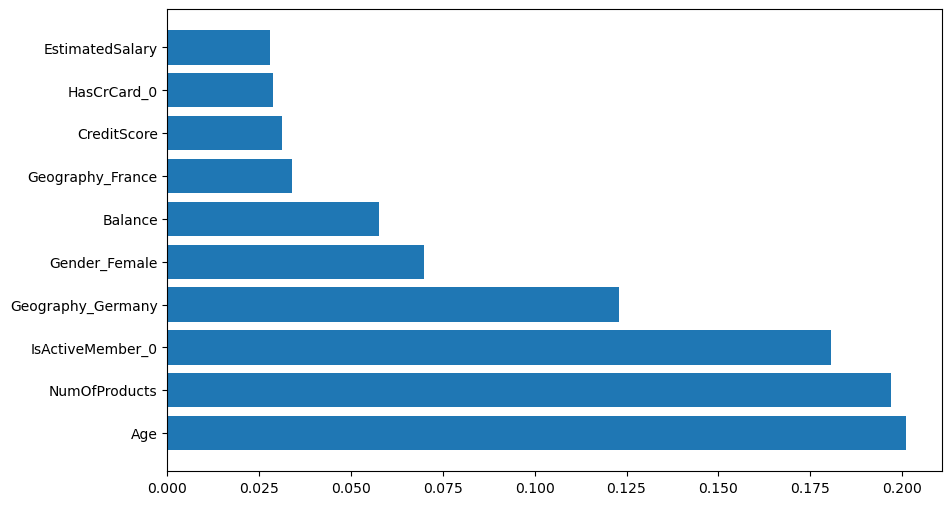

In [17]:
plt.figure(figsize = (10, 6))
plt.barh(df_fi['Feature'][:10], df_fi['Importance'][:10])
plt.show()

**Conclusiones:** el modelo de clasificación le dio prioridad a variables tales como la Edad y el Numero de productos, pero no nos sirven para generar un perfil. Dentro de la información extraido se puede deducir que:

1.- No es un miembro activo.

2.- Proviene de Alemania, aunque tambien se puede incluir un porcentaje de Francia

3.- Es de genero fenenimo.

4.- No tiene tarjeta de credito.